In [1]:
import pickle as pkl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import cartopy

In [2]:
infile = open('real_estate_data_frame','rb')
frame = pkl.load(infile)
infile.close()

In [3]:
frame

,localization_y,localization_x,area,sewers,road,fence,water,electricity,gas,price
0,51.835925,19.193010,1004.0,brak,utwardzana,brak,wodociąg w drodze,w drodze,brak,90360.0
1,50.472433,19.233789,18.0,szambo,asfaltowa,żywopłot,wodociąg na działce,na działce,brak,229000.0
2,51.801330,19.189772,1200.0,brak,utwardzana,brak,brak,brak,brak,84000.0
3,53.723500,20.867400,1262.0,brak,utwardzana,brak,własne ujęcie/studnia,brak,brak,88340.0
4,52.094000,20.807400,950.0,brak,utwardzana,brak,brak,brak,brak,295000.0
...,...,...,...,...,...,...,...,...,...,...
7624,49.939618,19.889479,2000.0,brak,polna,brak,brak,brak,brak,360000.0
7625,49.907755,20.200424,35.2,brak,polna,brak,brak,brak,brak,315000.0
7626,50.026720,19.700051,4400.0,szambo,polna,brak,brak,brak,brak,160000.0
7627,49.987773,19.679529,4400.0,brak,polna,brak,brak,brak,brak,440000.0


In [4]:
frame.describe().transpose().loc[['area','price']]

,count,mean,std,min,25%,50%,75%,max
area,7629.0,3881.181342,2.007082e+04,2.86,1059.0,1536.0,3000.0,1515395.0
price,7629.0,584114.250990,1.667238e+06,150.00,114115.0,212750.0,480000.0,60000000.0


<AxesSubplot:title={'center':'Price distribution up to 1.000.000 PLN'}, xlabel='price', ylabel='Count'>

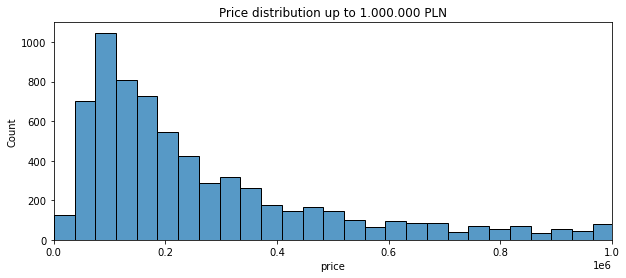

In [5]:
plt.figure(figsize=(10,4))

plt.xlim(0,1000000)
plt.title('Price distribution up to 1.000.000 PLN')
sns.histplot(frame['price'])

<AxesSubplot:title={'center':'Price distribution above 1.000.000 PLN'}, xlabel='price', ylabel='Count'>

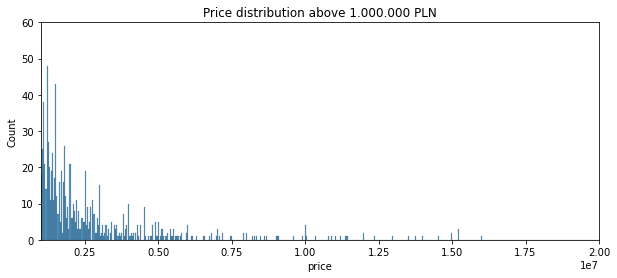

In [6]:
plt.figure(figsize=(10,4))
plt.xlim(1000000,20000000)
plt.ylim(0,60)
plt.title('Price distribution above 1.000.000 PLN')
sns.histplot(frame['price'])

<AxesSubplot:title={'center':'Area distribution up to 20.000 $m^{2}$'}, xlabel='area', ylabel='Count'>

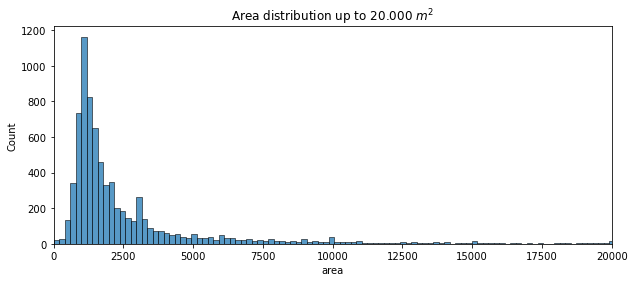

In [7]:
plt.figure(figsize=(10,4))
plt.xlim(0,20000)
plt.title('Area distribution up to 20.000 ' + r'$m^{2}$')
sns.histplot(frame['area'])

<AxesSubplot:title={'center':'Map with prices below 1.000.000 PLN'}, xlabel='area', ylabel='price'>

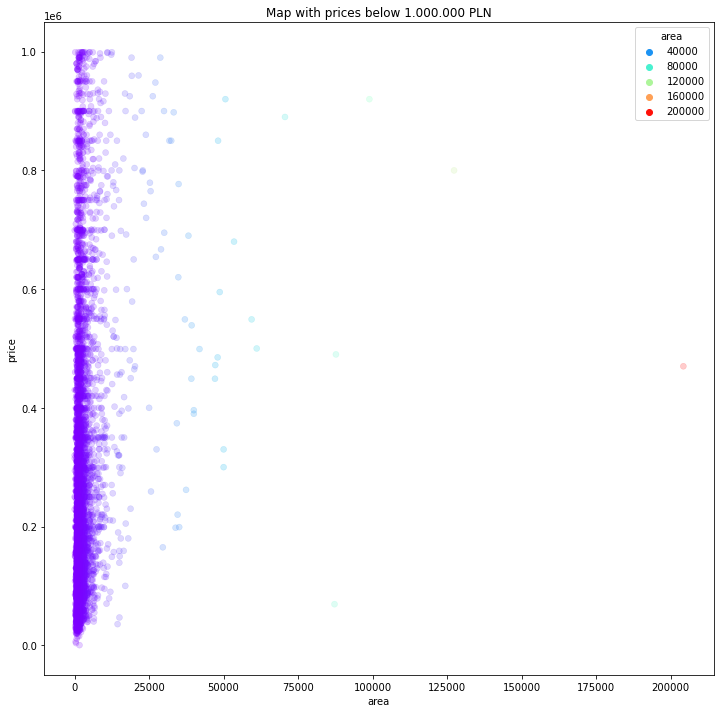

In [19]:
plt.figure(figsize=(12,12))
plt.title('Map with prices below 1.000.000 PLN')
# plt.xlim(0,10000)
# plt.ylim(0,100000)
sns.scatterplot(x='area', y='price',
                data=frame[frame['price']<1000000], hue='area',
                palette='rainbow', edgecolor=None,alpha=0.2)

<GeoAxesSubplot:title={'center':'Map with prices below 1.000.000 PLN'}, xlabel='localization_x', ylabel='localization_y'>

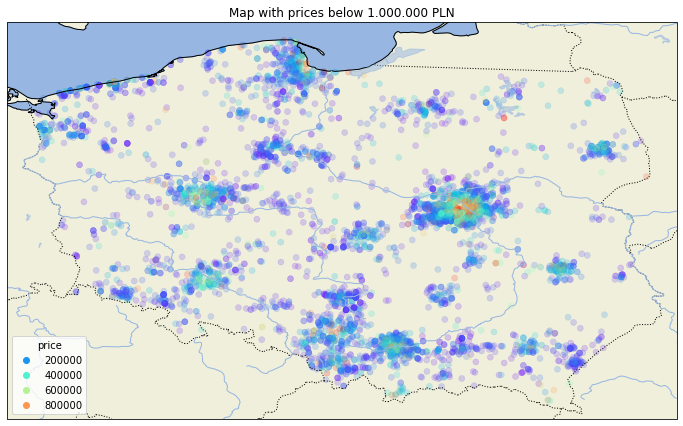

In [8]:
plt.figure(figsize=(12,12))

ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

plt.title('Map with prices below 1.000.000 PLN')
sns.scatterplot(x='localization_x', y='localization_y',
                data=frame[frame['price']<1000000], hue='price',
                palette='rainbow', edgecolor=None,alpha=0.2)

<GeoAxesSubplot:title={'center':'Map with prices above 1.000.000 PLN'}, xlabel='localization_x', ylabel='localization_y'>

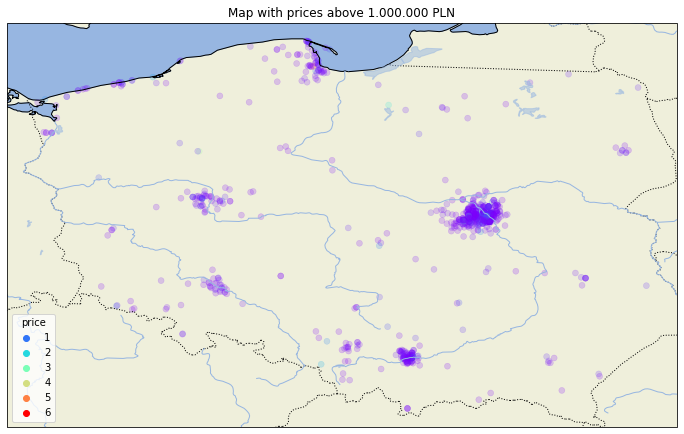

In [9]:
plt.figure(figsize=(12,12))

ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

plt.title('Map with prices above 1.000.000 PLN')
sns.scatterplot(x='localization_x', y='localization_y',
                data=frame[frame['price']>=1000000], hue='price',
                palette='rainbow', edgecolor=None,alpha=0.2)

<AxesSubplot:>

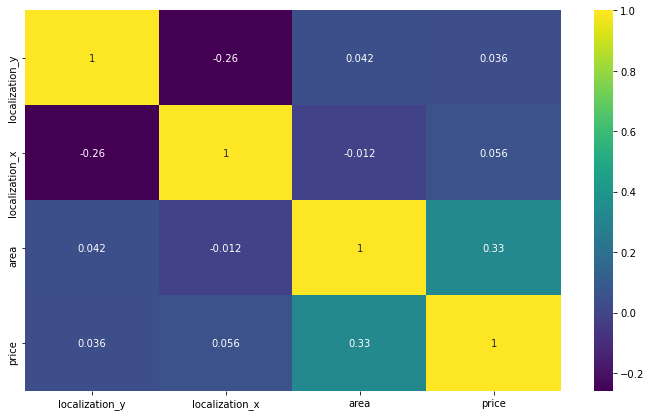

In [10]:
plt.figure(figsize=(12,7))
sns.heatmap(frame.corr(),annot=True,cmap='viridis')